In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


In [2]:
dataEDA=pd.read_csv("/Users/ghaidaa/Desktop/Bike-sharing/hour.csv")



In [3]:
dataEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
dataEDA.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df_trainEx, df_test =train_test_split(dataEDA , test_size = 0.2 , random_state=42)

In [6]:
# Rename column 
df_trainEx = dataEDA.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})





In [7]:
dataEDA.duplicated().sum()

0

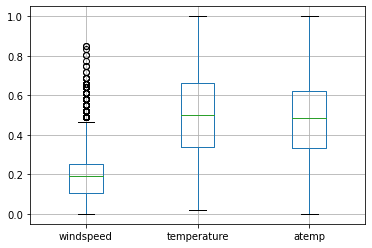

In [8]:
boxplot = df_trainEx.boxplot(column=['windspeed','temperature','atemp'])

In [9]:
df_trainEx.weather.unique()

array([1, 2, 3, 4])

In [10]:
df_trainEx.shape

(17379, 17)

In [11]:
#Outlier_col= df_trainEx[[ 'windspeed','temperature','atemp']]

In [12]:
#Q1 = df_trainEx.quantile(0.25)
#Q3 = df_trainEx.quantile(0.75)

In [13]:
#IQR = Q3 - Q1
#df_trainEx =df_trainEx[~((df_trainEx < (Q1 - 1.5 * IQR)) |(df_trainEx > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
df_trainEx.shape

(17379, 17)

In [15]:
#sns.set_palette("RdBu_r")
#boxplot = df_trainEx.boxplot(column=['windspeed','temperature','atemp'])

In [16]:
#change value in each column 
df_trainEx['season'] = df_trainEx['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df_trainEx['year'] = df_trainEx['year'].map({0:'2011', 1:'2012'})
df_trainEx['is_holiday'] = df_trainEx['is_holiday'].map({0:'No', 1:'Yes'})
df_trainEx['weekday'] = df_trainEx['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df_trainEx['is_workingday'] = df_trainEx['is_workingday'].map({0:'No', 1:'Yes'})
df_trainEx['weather'] = df_trainEx['weather'].map({1:'Clear', 2:'Cloudy', 3:'Rain', 4:'Storm'})




In [17]:
df_trainEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         17379 non-null  int64  
 1   datetime       17379 non-null  object 
 2   season         17379 non-null  object 
 3   year           17379 non-null  object 
 4   month          17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   is_holiday     17379 non-null  object 
 7   weekday        17379 non-null  object 
 8   is_workingday  17379 non-null  object 
 9   weather        17379 non-null  object 
 10  temperature    17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  humidity       17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  total_count    17379 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2

In [18]:
df_trainEx.head()

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
df_trainEx.sample(5)

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
6642,6643,2011-10-09,Fall,2011,10,8,No,Monday,No,Clear,0.46,0.4545,0.88,0.0000,25,82,107
17307,17308,2012-12-29,Winter,2012,12,0,No,Sunday,No,Cloudy,0.24,0.2424,0.70,0.0000,1,25,26
11466,11467,2012-04-27,Spring,2012,4,23,No,Saturday,Yes,Clear,0.40,0.4091,0.40,0.2537,11,105,116
4921,4922,2011-07-28,Summer,2011,7,23,No,Friday,Yes,Clear,0.76,0.7424,0.75,0.1940,28,95,123
64,65,2011-01-03,Winter,2011,1,19,No,Tuesday,Yes,Clear,0.20,0.2576,0.47,0.0000,8,102,110


In [20]:
df_trainEx.describe()

,rec_id,month,hr,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
dataEDA.weathersit.unique()

array([1, 2, 3, 4])

In [22]:
df_trainEx.season.value_counts()

Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: season, dtype: int64

In [23]:
df_trainEx.year.unique()

array(['2011', '2012'], dtype=object)

In [24]:
df_trainEx.year.value_counts()

2012    8734
2011    8645
Name: year, dtype: int64

In [25]:
df_trainEx.weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [26]:
df_trainEx.weekday.value_counts()

Sunday       2512
Monday       2502
Saturday     2487
Tuesday      2479
Thursday     2475
Friday       2471
Wednesday    2453
Name: weekday, dtype: int64

In [27]:
df_trainEx.is_holiday.unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df_trainEx.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

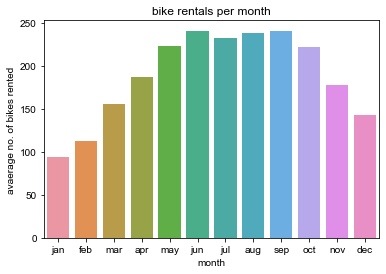

In [29]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
ax = sns.barplot('month', 'total_count', data=df_trainEx, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)
sns.set_style("dark")
plt.title('bike rentals per month')

plt.show()

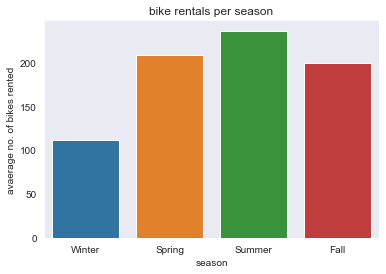

In [30]:
#season = 'Springer,Summer,Fall,Winter'.split(',')
ax = sns.barplot('season', 'total_count', data=df_trainEx, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('season')
#ax.set_xticklabels(season)
sns.set_style("dark")
plt.title('bike rentals per season')

plt.show()

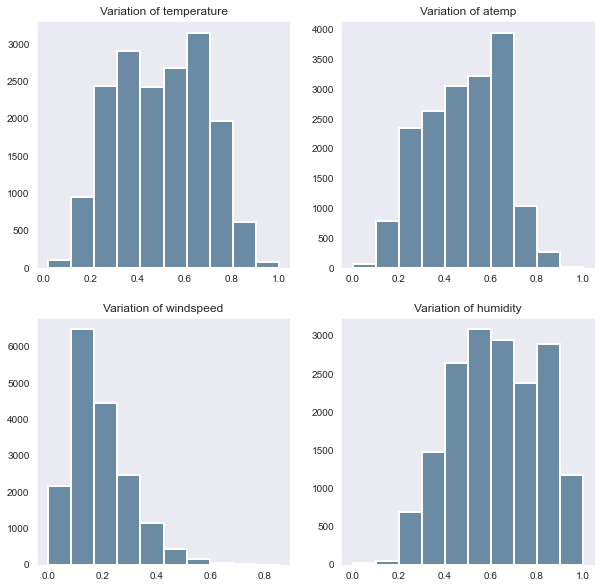

In [31]:
df_trainEx.temperature.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temperature",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[0,0].set_title("Variation of temperature")
axes[0,1].hist(x="atemp",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

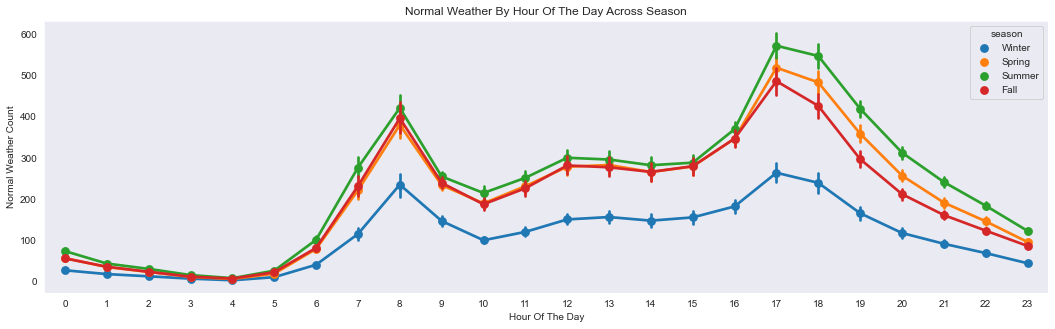

In [32]:
fig, ax = plt.subplots(figsize=(18, 5))
#seasons = ['spring', 'summer', 'fall', 'winter']
#ax.set_xticklabels(seasons)
sns.set_style("dark")

sns.pointplot(x=df_trainEx["hr"], y=df_trainEx["total_count"], hue=df_trainEx["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

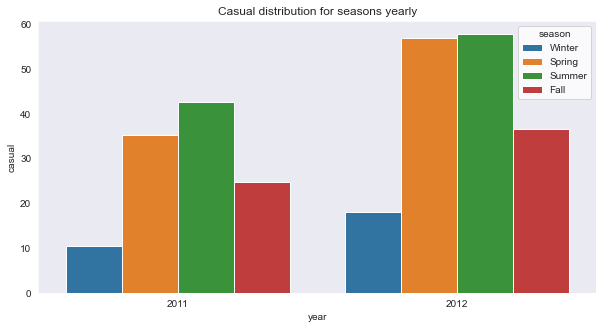

In [33]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='year',y='casual',data=df_trainEx,hue='season',ax=ax,ci=None)
sns.set_style("dark")


Years = '2011,2012'.split(',')
ax.set_xticklabels(Years)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

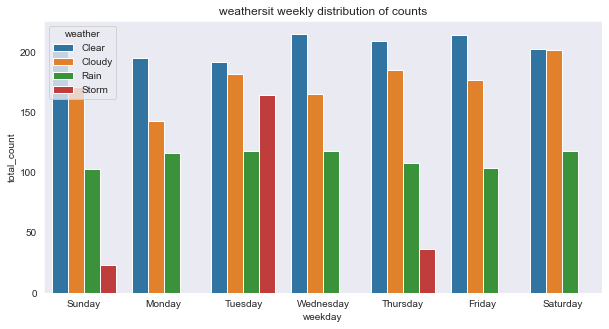

In [34]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='total_count',data=df_trainEx,hue='weather',ax=ax,ci=None)
ax.set_title('weathersit weekly distribution of counts')
sns.set_style("ticks")
#sns.set_palette("RdBu_r")

#fig.patch.set_facecolor('EBEAF2')

plt.show()

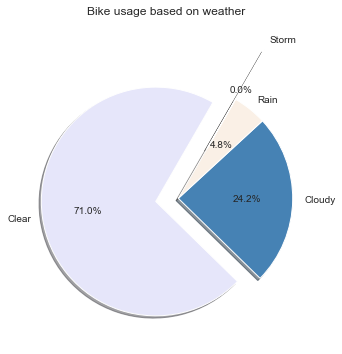

In [35]:
plt.figure(figsize=(5, 6))

labels = 'Clear', 'Cloudy', 'Rain', 'Storm'
sizes = df_trainEx.total_count.groupby(df_trainEx.weather).sum().tolist()
sns.set_style("dark")


colors = ['lavender', 'steelblue', 'linen', 'silver']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()


In [36]:
data=df_trainEx.drop(['rec_id','datetime','casual','registered','month', 'is_holiday','weekday','is_workingday', 'atemp','hr'], axis=1)






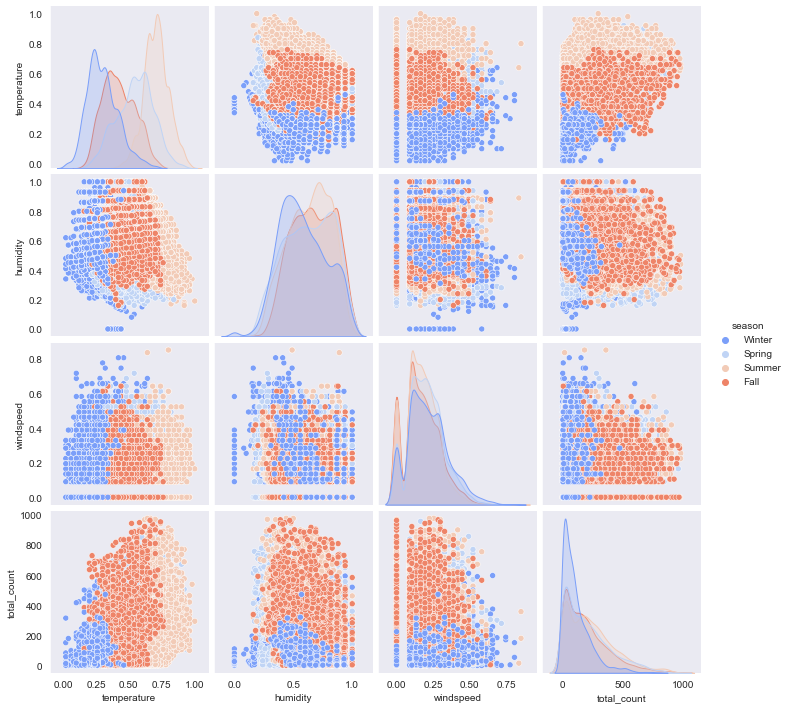

In [37]:
sns.set_style("dark")


sns.pairplot(data,hue='season',palette='coolwarm');


In [38]:
data['windspeed']=data['windspeed'].replace(0, np.nan)
data['temperature']=data['temperature'].replace(0, np.nan)
data['humidity']=data['humidity'].replace(0, np.nan)


#imp = KNNImputer(n_neighbors=5)



In [39]:
data=data.dropna(subset=['windspeed', 'temperature','humidity'])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15177 entries, 5 to 17378
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       15177 non-null  object 
 1   year         15177 non-null  object 
 2   weather      15177 non-null  object 
 3   temperature  15177 non-null  float64
 4   humidity     15177 non-null  float64
 5   windspeed    15177 non-null  float64
 6   total_count  15177 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 948.6+ KB


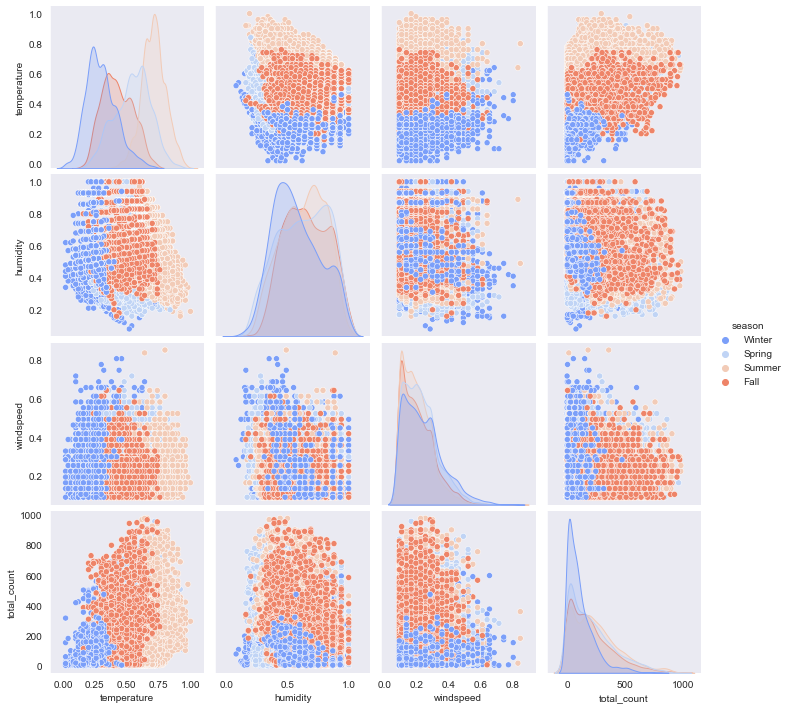

In [41]:
sns.set_style("dark")


sns.pairplot(data,hue='season',palette='coolwarm');

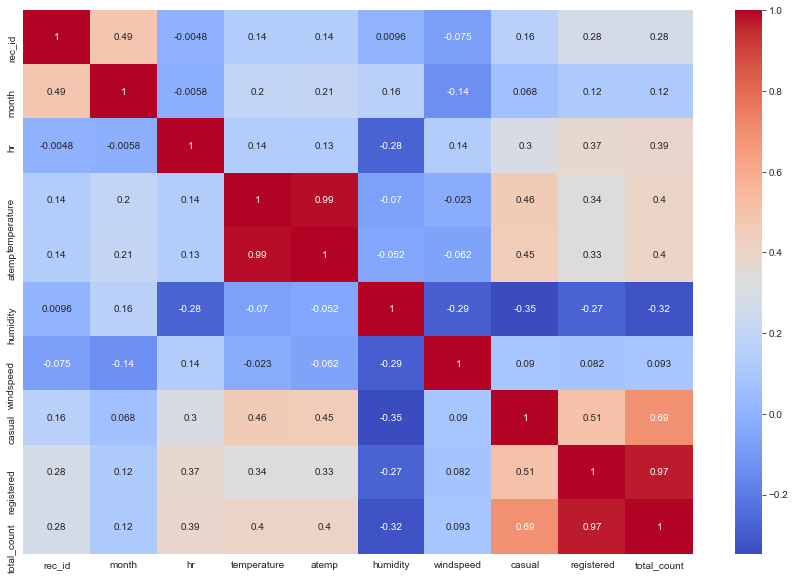

In [42]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_trainEx.corr(), annot=True, cmap='coolwarm');

In [115]:
data=pd.read_csv("/Users/ghaidaa/Desktop/Bike-sharing/hour.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [116]:


data = data.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         17379 non-null  int64  
 1   datetime       17379 non-null  object 
 2   season         17379 non-null  int64  
 3   year           17379 non-null  int64  
 4   month          17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   is_holiday     17379 non-null  int64  
 7   weekday        17379 non-null  int64  
 8   is_workingday  17379 non-null  int64  
 9   weather        17379 non-null  int64  
 10  temperature    17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  humidity       17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  total_count    17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 

In [117]:
categoricalFeatureNames = ["season","is_holiday","is_workingday","weather","weekday","month","year","hr"]
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [118]:
data.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hr', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   rec_id         17379 non-null  int64   
 1   datetime       17379 non-null  object  
 2   season         17379 non-null  category
 3   year           17379 non-null  category
 4   month          17379 non-null  category
 5   hr             17379 non-null  category
 6   is_holiday     17379 non-null  category
 7   weekday        17379 non-null  category
 8   is_workingday  17379 non-null  category
 9   weather        17379 non-null  category
 10  temperature    17379 non-null  float64 
 11  atemp          17379 non-null  float64 
 12  humidity       17379 non-null  float64 
 13  windspeed      17379 non-null  float64 
 14  casual         17379 non-null  int64   
 15  registered     17379 non-null  int64   
 16  total_count    17379 non-null  int64   
dtypes: category(8), float64(4), int

In [120]:
#data['windspeed']=data['windspeed'].replace(0, np.nan)
#data['humidity']=data['humidity'].replace(0, np.nan)
#data.isna().sum()

In [121]:
#data=data.dropna(subset=['windspeed','humidity'])

In [122]:
#data1=data

In [123]:
#Q1 = data.quantile(0.25)
#Q3 = data.quantile(0.75)


In [124]:
#data.dropna(inplace=True)

In [125]:
data = pd.concat([data, pd.get_dummies(data['season'], prefix='season',drop_first=True)],axis=1)
data = pd.concat([data, pd.get_dummies(data['hr'], prefix='hr',drop_first=True)],axis=1)


data= data.drop(["season","hr"],axis=1)









In [126]:
X, y = data.drop(['datetime','rec_id','total_count','casual', 'atemp','registered','weekday','is_holiday'],axis=1), data['total_count']


In [127]:
X.shape

(17379, 33)

In [128]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)


In [129]:
X.columns

Index(['year', 'month', 'is_workingday', 'weather', 'temperature', 'humidity',
       'windspeed', 'season_2', 'season_3', 'season_4', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [130]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.01)

lasso_model = Lasso(alpha = 0.01)#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [131]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lasso_model.fit(X_train_scaled, y_train)
print(f'Lasso Regression val R^2: {lasso_model.score(X_val_scaled, y_val):.3f}')



lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.690
Ridge Regression val R^2: 0.690
Lasso Regression val R^2: 0.690
Degree 2 polynomial regression val R^2: 0.901


In [132]:
selected_columns = ['year', 'month', 'weekday', 'is_workingday', 'weather',
       'temperature', 'humidity', 'windspeed','hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7',
       'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'season_2', 'season_3', 'season_4', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23' ]

In [133]:
list(zip(selected_columns, lasso_model.coef_))


[('year', 42.82143964359314),
 ('month', -2.367553140846701),
 ('weekday', 3.141704340088801),
 ('is_workingday', -14.973640376556306),
 ('weather', 46.885814585821905),
 ('temperature', -14.274329994023876),
 ('humidity', -5.158929029915061),
 ('windspeed', 18.983648377889967),
 ('hr_1', 13.985851776122535),
 ('hr_2', 31.326417980450486),
 ('hr_3', -3.210457347373598),
 ('hr_4', -5.4919443421228005),
 ('hr_5', -6.439174120007214),
 ('hr_6', -7.363819734801992),
 ('hr_7', -4.2868737222720785),
 ('hr_8', 6.792557071840152),
 ('hr_9', 34.2225152187832),
 ('hr_10', 65.25167527090584),
 ('hr_11', 32.210217053224895),
 ('hr_12', 22.992883942970128),
 ('hr_13', 26.106505498639965),
 ('hr_14', 36.41569755206955),
 ('hr_15', 34.34076661491245),
 ('hr_16', 30.583463437740598),
 ('hr_17', 31.99671058691946),
 ('hr_18', 45.34228748235342),
 ('hr_19', 76.99176687811193),
 ('hr_20', 68.66968798123006),
 ('hr_21', 46.58684282304454),
 ('hr_22', 31.915605585251058),
 ('hr_23', 21.826585003606322),
 (

In [142]:
i=[('polynomial',PolynomialFeatures(degree=2),'modal',LinearRegression())]

In [141]:
preds = np.poly1d(np.polyfit(X_test))

TypeError: _polyfit_dispatcher() missing 2 required positional arguments: 'y' and 'deg'

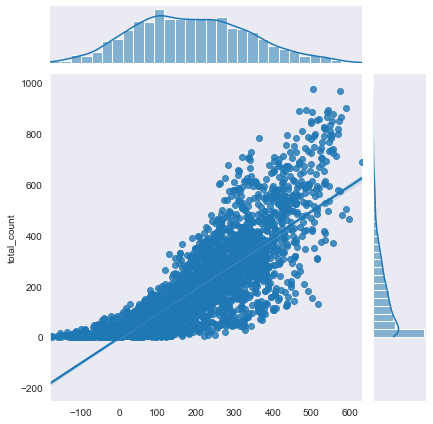

In [139]:

sns.jointplot(x=preds,y=y_test, kind='reg');




In [136]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.674


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm1 = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each


In [ ]:
X_train['windspeed']=X_train['windspeed'].replace(0, np.nan)
X_train['humidity']=X_train['humidity'].replace(0, np.nan)
#X_val['humidity']=X_val['humidity'].replace(0, np.nan)
#X_val['windspeed']=X_val['windspeed'].replace(0, np.nan)




#X_train_scaled['windspeed']=X_train_scaled['windspeed'].replace(0, np.nan)
#X_train_poly['windspeed']=X_train_poly['windspeed'].replace(0, np.nan)

X_train.isna().sum()




In [ ]:
#X_val.isna().sum()



In [108]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

#validate
pipelinelm = Pipeline(steps=[('i', KNNImputer(n_neighbors=5)), ('lm', lm1)])

scaler = StandardScaler()
pipelinelm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm1.score(X_val, y_val):.3f}')


Linear Regression val R^2: 0.677


In [86]:
from sklearn.model_selection import KFold


X, y = data.drop(['datetime','rec_id','total_count','casual', 'atemp','registered','weekday','is_holiday'],axis=1), data['total_count']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s,cv_lm_las_r2s = [], [],[] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm1 = LinearRegression()
    lm_reg1 = Ridge(alpha=1)
    lasso_model1 = Lasso(alpha = 0.01)#Feature transforms for train, val, and test so that we can run our poly model on each
    poly = PolynomialFeatures(degree=2) 
    
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    
     #lasso with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lasso_model1.fit(X_train_scaled, y_train)
    cv_lm_las_r2s.append(lm_reg.score(X_val_scaled, y_val))  

    #polynomial with feature scaling
    #X_train_poly = poly.fit_transform(X_train)
    #X_val_poly = poly.transform(X_val)
    #X_test_poly = poly.transform(X_test)
    
    #lm_poly.fit(X_train_poly, y_train)
    #lm_poly.append(lm_poly.score(X_val_poly, y_val))

                              

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Lasso scores: ', cv_lm_las_r2s, '\n')
#print('ployn         omial degree(2) scores: ', lm_poly, '\n')


print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'lasso mean cv r^2: {np.mean(cv_lm_las_r2s):.3f} +- {np.std(cv_lm_las_r2s):.3f}')
#print(f'ploynomial degree(2) mean cv r^2: {np.mean(lm_poly):.3f} +- {np.std(lm_poly):.3f}')





Simple regression scores:  [0.6781156192299201, 0.6611902116558049, 0.687180116403828, 0.6776986736264143, 0.6770535762904566]
Ridge scores:  [0.6781090421796252, 0.6611915421474639, 0.6871841407748388, 0.6776982926667428, 0.6770553140687853] 

Lasso scores:  [0.6781090421796252, 0.6611915421474639, 0.6871841407748388, 0.6776982926667428, 0.6770553140687853] 

Simple mean cv r^2: 0.676 +- 0.008
Ridge mean cv r^2: 0.676 +- 0.008
lasso mean cv r^2: 0.676 +- 0.008


In [146]:
#Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
#pipe=Pipeline(Input)
#pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

In [107]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_train,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.682


In [ ]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric